In [13]:
import pandas as pd
from pandas_datareader import data as web

## Basic Financial analysis

### 1. Import Finanacial data ( QQQ ETF ) using DataReader

In [2]:
QQQ = web.DataReader(name='QQQ',data_source = 'yahoo',start='2000-1-1')

In [3]:
QQQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5262 entries, 1999-12-31 to 2020-11-27
Data columns (total 6 columns):
High         5262 non-null float64
Low          5262 non-null float64
Open         5262 non-null float64
Close        5262 non-null float64
Volume       5262 non-null float64
Adj Close    5262 non-null float64
dtypes: float64(6)
memory usage: 287.8 KB


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

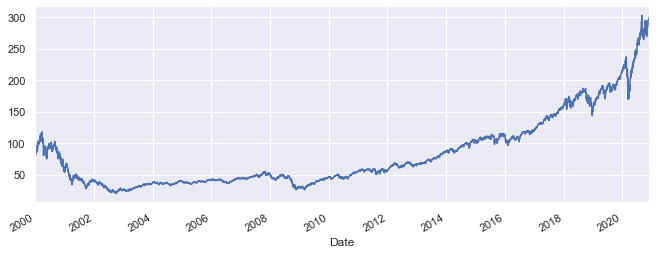

In [5]:
plt.close()
sns.set(rc={'figure.figsize':(11,4)})
QQQ['Close'].plot()

### 2. Calculate log return

#### 1) Loop-method

In [6]:
%%time
QQQ['Return_Loop'] = 0.0
for i in range(1,len(QQQ)):
    QQQ['Return_Loop'][i] = np.log(QQQ['Close'][i] / QQQ['Close'][i-1])

Wall time: 748 ms


In [7]:
QQQ[['Close','Return_Loop']].tail()

,Close,Return_Loop
Date,,
2020-11-20,290.380005,-0.006864
2020-11-23,290.390015,0.000034
2020-11-24,294.470001,0.013952
2020-11-25,296.279999,0.006128
2020-11-27,299.010010,0.009172


#### 2) Array-based method

In [8]:
%time QQQ['Return'] = np.log(QQQ['Close'] / QQQ['Close'].shift(1))

Wall time: 18 ms


In [9]:
del QQQ['Return_Loop']

### 3. Analysis

C:\Users\ico10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ico10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ico10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\ico10\Anaconda3\lib\site-packages\pandas\plotting\_matpl

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023FBC447588>,
      dtype=object)

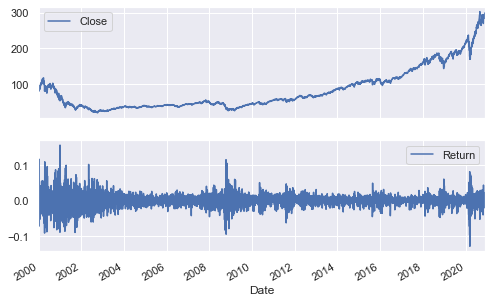

In [11]:
plt.close()
QQQ[['Close','Return']].plot(subplots=True, style='b',
                            figsize=(8,5))

 - 변동성 군집  
     : 변동성이 높게 유지되는 구간, 낮게 유지되는 구간이 존재
 - 레버리지 효과  
     : 변동성과 수익률은 음의 상관 관계

In [15]:
QQQ['42d'] = QQQ['Close'].rolling(42).mean()
QQQ['252d'] = QQQ['Close'].rolling(252).mean()
QQQ[['Close','42d','252d']].tail()

,Close,42d,252d
Date,,,
2020-11-20,290.380005,283.533811,240.209762
2020-11-23,290.390015,284.129049,240.561191
2020-11-24,294.470001,284.674526,240.919326
2020-11-25,296.279999,285.128811,241.283096
2020-11-27,299.010010,285.677859,241.652024


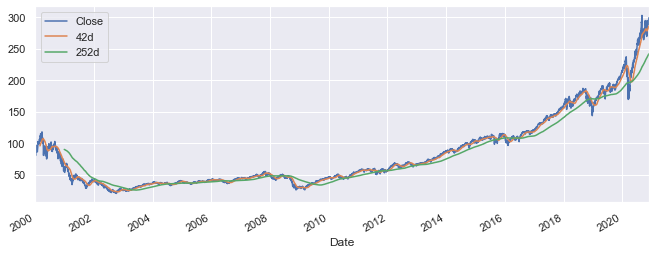

In [16]:
plt.close()
QQQ[['Close','42d','252d']].plot()

- Annualized volatility:
    : std(N) * sqrt(252)  
    252: trading day per year  
https://www.macroption.com/why-is-volatility-proportional-to-square-root-of-time/


In [20]:
import math
QQQ['Mov_Vol']=QQQ['Return'].rolling(252).std() * math.sqrt(252)

C:\Users\ico10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ico10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ico10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\ico10\Anaconda3\lib\site-packages\pandas\plotting\_matpl

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023FC2B1A4C8>,
      dtype=object)

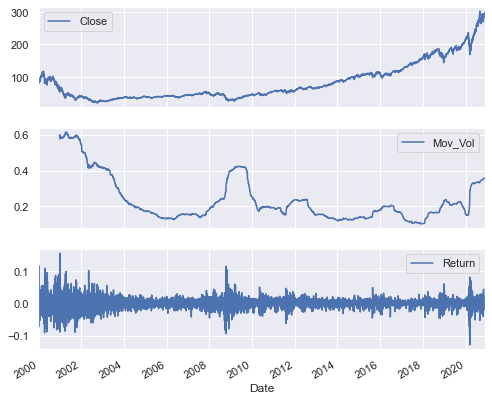

In [28]:
QQQ[['Close','Mov_Vol','Return']].plot(subplots=True, style='b',figsize=(8,7))